In [164]:
import numpy as np
import pandas as pd
from pandas import json_normalize
from google.colab import files


# 📌 Extracción(E - Extract)

In [165]:
df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformación (T - Transform)

## Conocer el conjunto de datos

In [166]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [167]:
df.shape

(7267, 6)

In [168]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## Normalizar columna customer

In [170]:
df.loc[0, 'customer']

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [171]:

# Normaliza la columna 'customer' (crea un nuevo DataFrame con las claves del JSON como columnas)
customer_df = json_normalize(df['customer'])


In [172]:
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [173]:
# Combina el DataFrame original con el nuevo DataFrame normalizado
df = df.join(customer_df)



In [174]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7267 non-null   object
 1   Churn          7267 non-null   object
 2   customer       7267 non-null   object
 3   phone          7267 non-null   object
 4   internet       7267 non-null   object
 5   account        7267 non-null   object
 6   gender         7267 non-null   object
 7   SeniorCitizen  7267 non-null   int64 
 8   Partner        7267 non-null   object
 9   Dependents     7267 non-null   object
 10  tenure         7267 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 624.6+ KB


In [176]:
df['Partner'] = df['Partner'].astype('string')
df['Dependents'] = df['Dependents'].astype('string')
df['gender'] = df['gender'].astype('string')

## Normalizar columna phone

In [177]:
df.loc[0, 'phone']


{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [178]:
# Normaliza la columna 'phone' (crea un nuevo DataFrame con las claves del JSON como columnas)
phone_df = json_normalize(df['phone'])


In [179]:
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [180]:
# Combina el DataFrame original con el nuevo DataFrame normalizado
df = df.join(phone_df)

In [181]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7267 non-null   object
 1   Churn          7267 non-null   object
 2   customer       7267 non-null   object
 3   phone          7267 non-null   object
 4   internet       7267 non-null   object
 5   account        7267 non-null   object
 6   gender         7267 non-null   string
 7   SeniorCitizen  7267 non-null   int64 
 8   Partner        7267 non-null   string
 9   Dependents     7267 non-null   string
 10  tenure         7267 non-null   int64 
 11  PhoneService   7267 non-null   object
 12  MultipleLines  7267 non-null   object
dtypes: int64(2), object(8), string(3)
memory usage: 738.2+ KB


In [183]:
df['PhoneService'] = df['PhoneService'].astype('string')
df['MultipleLines'] = df['MultipleLines'].astype('string')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7267 non-null   object
 1   Churn          7267 non-null   object
 2   customer       7267 non-null   object
 3   phone          7267 non-null   object
 4   internet       7267 non-null   object
 5   account        7267 non-null   object
 6   gender         7267 non-null   string
 7   SeniorCitizen  7267 non-null   int64 
 8   Partner        7267 non-null   string
 9   Dependents     7267 non-null   string
 10  tenure         7267 non-null   int64 
 11  PhoneService   7267 non-null   string
 12  MultipleLines  7267 non-null   string
dtypes: int64(2), object(6), string(5)
memory usage: 738.2+ KB


## Normaliza columna internet

In [185]:
df.loc[0,'internet']

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [186]:
# Normaliza la columna 'internet' (crea un nuevo DataFrame con las claves del JSON como columnas)
internet_df = json_normalize(df['internet'])


In [187]:
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [188]:
df = df.join(internet_df)

In [189]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   customer          7267 non-null   object
 3   phone             7267 non-null   object
 4   internet          7267 non-null   object
 5   account           7267 non-null   object
 6   gender            7267 non-null   string
 7   SeniorCitizen     7267 non-null   int64 
 8   Partner           7267 non-null   string
 9   Dependents        7267 non-null   string
 10  tenure            7267 non-null   int64 
 11  PhoneService      7267 non-null   string
 12  MultipleLines     7267 non-null   string
 13  InternetService   7267 non-null   object
 14  OnlineSecurity    7267 non-null   object
 15  OnlineBackup      7267 non-null   object
 16  DeviceProtection  7267 non-null   object
 17  TechSupport   

In [191]:
df['InternetService'] = df['InternetService'].astype('string')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('string')
df['OnlineBackup'] = df['OnlineBackup'].astype('string')
df['DeviceProtection'] = df['DeviceProtection'].astype('string')
df['TechSupport'] = df['TechSupport'].astype('string')
df['StreamingTV'] = df['StreamingTV'].astype('string')
df['StreamingMovies'] = df['StreamingMovies'].astype('string')


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   customer          7267 non-null   object
 3   phone             7267 non-null   object
 4   internet          7267 non-null   object
 5   account           7267 non-null   object
 6   gender            7267 non-null   string
 7   SeniorCitizen     7267 non-null   int64 
 8   Partner           7267 non-null   string
 9   Dependents        7267 non-null   string
 10  tenure            7267 non-null   int64 
 11  PhoneService      7267 non-null   string
 12  MultipleLines     7267 non-null   string
 13  InternetService   7267 non-null   string
 14  OnlineSecurity    7267 non-null   string
 15  OnlineBackup      7267 non-null   string
 16  DeviceProtection  7267 non-null   string
 17  TechSupport   

## Normaliza columna account

In [193]:
df.loc[0,'account']

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [194]:
# Normaliza la columna 'internet' (crea un nuevo DataFrame con las claves del JSON como columnas)
account_df = json_normalize(df['account'])

In [195]:
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [196]:
df = df.join(account_df)

In [197]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   string 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   string 
 9   Dependents        7267 non-null   string 
 10  tenure            7267 non-null   int64  
 11  PhoneService      7267 non-null   string 
 12  MultipleLines     7267 non-null   string 
 13  InternetService   7267 non-null   string 
 14  OnlineSecurity    7267 non-null   string 
 15  OnlineBackup      7267 non-null   string 
 16  DeviceProtection  7267 non-null   string 


In [199]:
# Convierte la columna a numérico, convirtiendo valores inválidos en NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [200]:
# reemplazar esos NaN con 0
df['Charges.Total'].fillna(0, inplace=True)


<ipython-input-200-2148817103>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(0, inplace=True)


In [201]:
df['Contract'] = df['Contract'].astype('string')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('string')
df['PaymentMethod'] = df['PaymentMethod'].astype('string')
df['Charges.Total'] = df['Charges.Total'].astype('float64')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   string 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   string 
 9   Dependents        7267 non-null   string 
 10  tenure            7267 non-null   int64  
 11  PhoneService      7267 non-null   string 
 12  MultipleLines     7267 non-null   string 
 13  InternetService   7267 non-null   string 
 14  OnlineSecurity    7267 non-null   string 
 15  OnlineBackup      7267 non-null   string 
 16  DeviceProtection  7267 non-null   string 


## Comprobación de incoherencias en los datos

In [203]:
df['customerID'].is_unique


True

In [204]:
df['Churn'].is_unique

False

In [205]:
df.loc[0]

,0
customerID,0002-ORFBO
Churn,No
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
internet,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
account,"{'Contract': 'One year', 'PaperlessBilling': '..."
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes


# Manejo de inconsistencias

## Estandarización y transformación de datos (opcional)

In [206]:
# renombrar una columna

df = df.rename(columns={'customerID':'CustomerId'})


In [207]:
df = df.rename(columns={'gender':'Gender'})

In [208]:
df.head()

,CustomerId,Churn,customer,phone,internet,account,Gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [209]:
df['Gender'].value_counts()

,count
Gender,
Male,3675
Female,3592


# Columna de cuentas diarias

In [210]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] /30


In [211]:
df.head()

,CustomerId,Churn,customer,phone,internet,account,Gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


# Estandarización y transformación de datos (opcional)

In [212]:
# Verificar si todos los valores son "Sí" o "No"

valores_validos = ['Yes', 'No']
resultado = df['Churn'].isin(valores_validos).all()
print(resultado)


False


In [213]:
df[~df['Churn'].isin(['Yes', 'No'])]


,CustomerId,Churn,customer,phone,internet,account,Gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
30,0047-ZHDTW,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,No,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,2.633333
75,0120-YZLQA,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0.663333
96,0154-QYHJU,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Male,0,No,No,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1.958333
98,0162-RZGMZ,,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,No,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,1.996667
175,0274-VVQOQ,,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '...",Male,1,Yes,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,...,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,1.808333
7180,9872-RZQQB,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,Yes,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-GNDMB,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,2.541667
7239,9955-RVWSC,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,0.641667


In [214]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


la columna 'Churn' no puede ser covertida  en valores binarios (1 y 0) ya que contiene valores vacios.

In [215]:
df['Partner'].value_counts()

,count
Partner,
No,3749
Yes,3518


In [216]:
# convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})


In [217]:
df['Partner'].value_counts()

,count
Partner,
0,3749
1,3518


# Análisis Descriptivo

In [218]:
df.describe()

,SeniorCitizen,Partner,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,32.346498,64.720098,2277.182035,2.157337
std,0.369074,0.499782,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,1.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


In [219]:
df['Cuentas_Diarias'].mean()

np.float64(2.1573365900646757)

In [220]:
df['Cuentas_Diarias'].max()

3.9583333333333335

In [221]:
df['Cuentas_Diarias'].min()

0.6083333333333333

In [222]:
df['Cuentas_Diarias'].std()

1.0043190628555607

# Distribución de evasión

In [223]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [224]:
## Dado que se observa que existen registros sin churn definidos estos registros seran eliminados


df = df[df['Churn'].notna() & (df['Churn'] != '')]



In [225]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


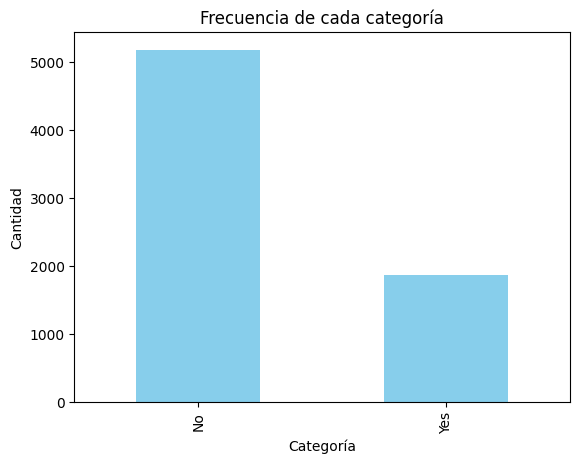

In [226]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de cada categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()


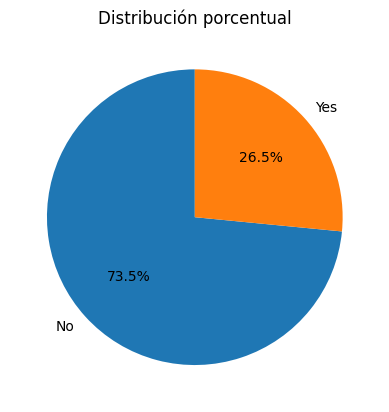

In [227]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución porcentual de la evasión')
plt.ylabel('')  # Quitar etiqueta del eje Y
plt.show()


<ipython-input-240-555489312>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

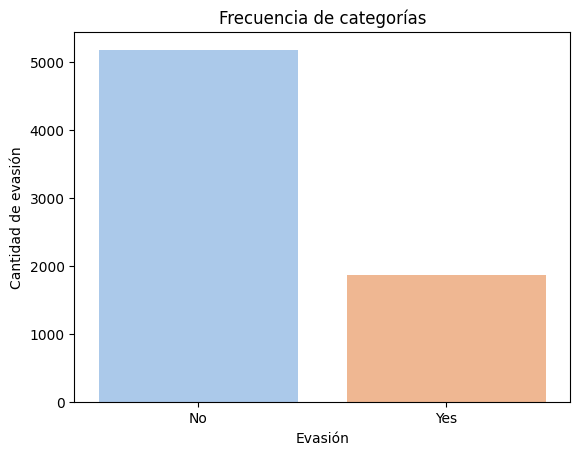

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Frecuencia de categorías')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de evasión')
plt.savefig('Frecuencia de categorías.png', dpi=300)

files.download('Frecuencia de categorías.png')


plt.show()


## Recuento de evasión por variables categóricas

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

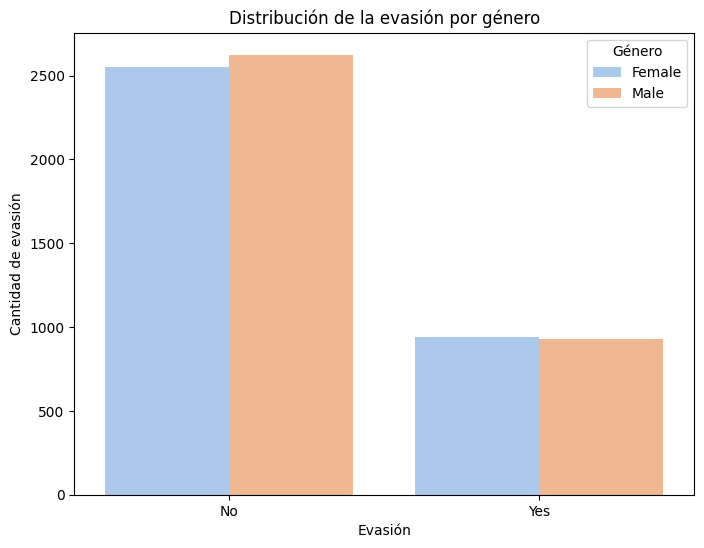

In [241]:
# Evasion por genero

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='Gender', palette='pastel')
plt.title('Distribución de la evasión por género')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de evasión')
plt.legend(title='Género')
plt.savefig('Distribución por categoría y género.png', dpi=300)

files.download('Distribución por categoría y género.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

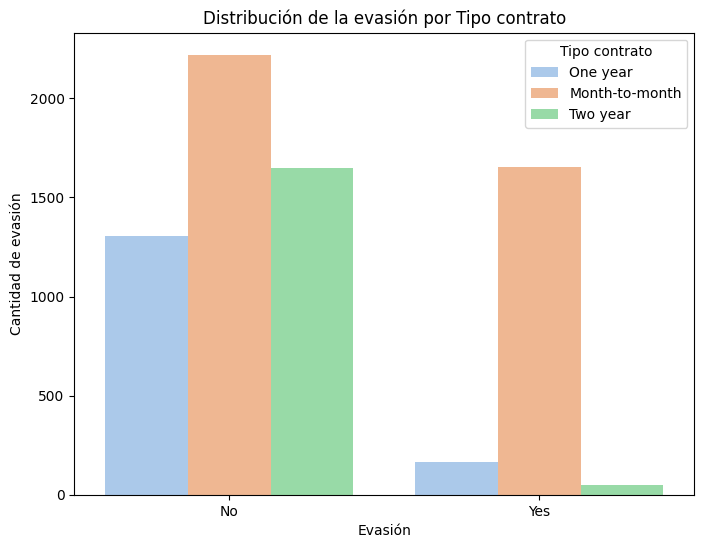

In [245]:
## Distribución de la evasión por Tipo contrato

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='Contract', palette='pastel')
plt.title('Distribución de la evasión por Tipo contrato')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de evasión')
plt.legend(title='Tipo contrato')
plt.savefig('Distribución de la evasión por Tipo contrato.png', dpi=300)

files.download('Distribución de la evasión por Tipo contrato.png')
plt.show()

**Importante**: segun el grafico anterior se observa que la evasión es mayor en el tipo de contrato Month-to-month.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

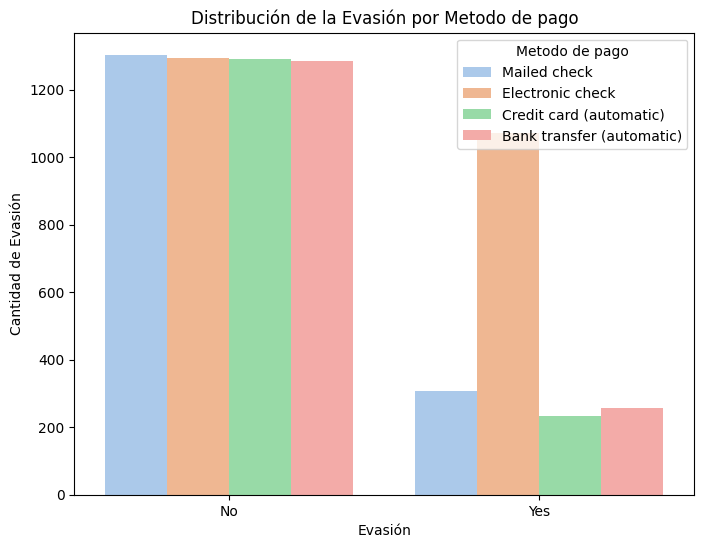

In [247]:
## Metodo de pago

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='PaymentMethod', palette='pastel')
plt.title('Distribución de la Evasión por Metodo de pago')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de Evasión')
plt.legend(title='Metodo de pago')
plt.savefig('Distribución de la Evasión por Metodo de pago.png', dpi=300)
files.download('Distribución de la Evasión por Metodo de pago.png')
plt.show()



**Importante**: segun el grafico anterior se observa que la evasión es mayor en el metodo Electronic check.

# Conteo de evasión por variables numéricas

In [232]:
agrupado = df.groupby('Churn')['Charges.Total'].agg(['mean', 'max', 'min', 'std']).reset_index()


In [233]:
agrupado

,Churn,mean,max,min,std
0,No,2549.911442,8672.45,0.00,2329.954215
1,Yes,1531.796094,8684.80,18.85,1890.822994


In [234]:
df_melt = agrupado.melt(id_vars='Churn', var_name='Estadística', value_name='Valor')


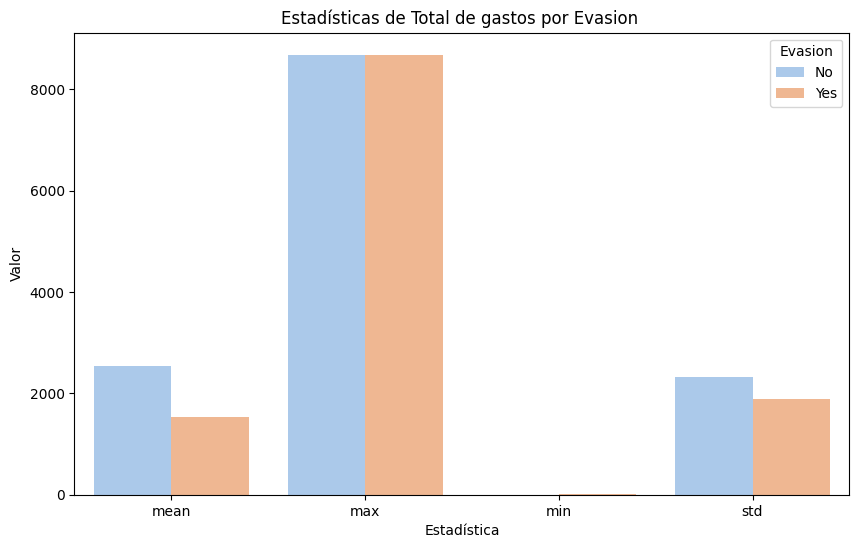

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [242]:
lt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x='Estadística', y='Valor', hue='Churn', palette='pastel')

plt.title('Estadísticas de Total de gastos por Evasion ')
plt.ylabel('Valor')
plt.xlabel('Estadística')
plt.legend(title='Evasion')
plt.show()
plt.savefig('Estadísticas de Total de gastos por Evasion.png', dpi=300)

files.download('Estadísticas de Total de gastos por Evasion.png')

In [236]:
df_filtrado = df[df['Churn'].notna() & (df['Churn'] != '')]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

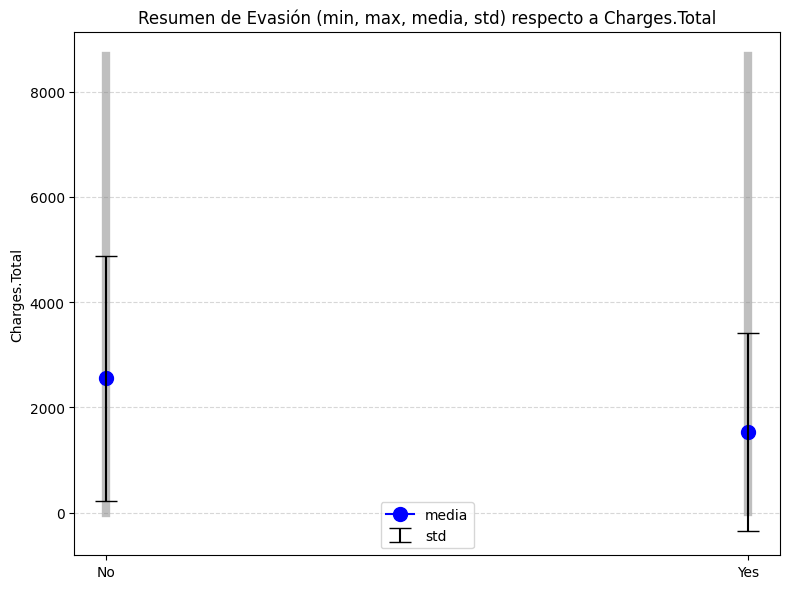

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular estadísticas por grupo (solo con datos válidos)
stats = df_filtrado.groupby('Churn')['Charges.Total'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Posiciones en eje X
x = range(len(stats))
labels = stats['Churn']
means = stats['mean']
mins = stats['min']
maxs = stats['max']
stds = stats['std']

# Crear gráfico
plt.figure(figsize=(8, 6))

for i in x:
    # Línea vertical del min al max
    plt.plot([i, i], [mins[i], maxs[i]], color='gray', linewidth=6, alpha=0.5)

    # Punto para la media
    plt.plot(i, means[i], marker='o', color='blue', markersize=10, label='media' if i == 0 else "")

    # Barra de error (std)
    plt.errorbar(i, means[i], yerr=stds[i], fmt='none', ecolor='black', capsize=8, label='std' if i == 0 else "")

# Etiquetas y leyenda
plt.xticks(ticks=x, labels=labels)
plt.ylabel('Charges.Total')
plt.title('Resumen de Evasión (min, max, media, std) respecto a Charges.Total')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Resumen de Evasión (min, max, media, std) respecto a Charges.Total.png', dpi=300)

files.download('Resumen de Evasión (min, max, media, std) respecto a Charges.Total.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

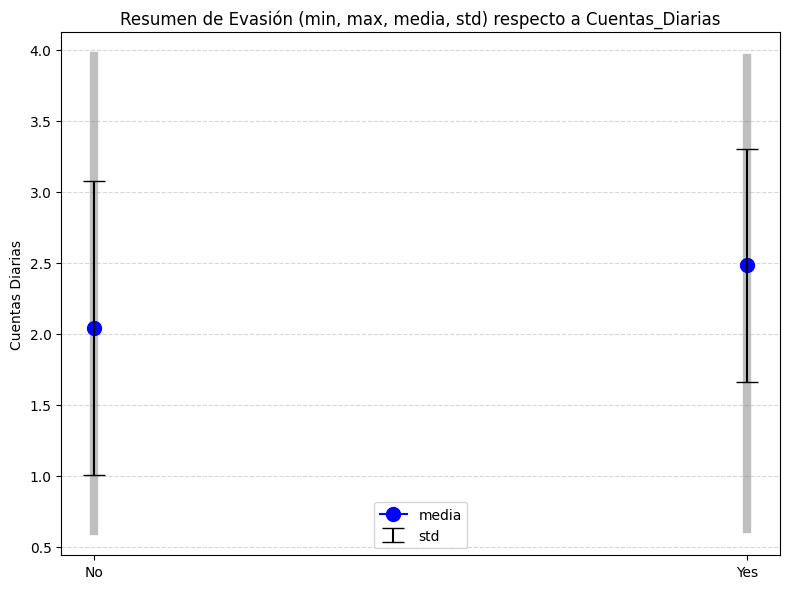

In [244]:
# Calcular estadísticas por grupo (solo con datos válidos)
stats = df_filtrado.groupby('Churn')['Cuentas_Diarias'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Posiciones en eje X
x = range(len(stats))
labels = stats['Churn']
means = stats['mean']
mins = stats['min']
maxs = stats['max']
stds = stats['std']

# Crear gráfico
plt.figure(figsize=(8, 6))

for i in x:
    # Línea vertical del min al max
    plt.plot([i, i], [mins[i], maxs[i]], color='gray', linewidth=6, alpha=0.5)

    # Punto para la media
    plt.plot(i, means[i], marker='o', color='blue', markersize=10, label='media' if i == 0 else "")

    # Barra de error (std)
    plt.errorbar(i, means[i], yerr=stds[i], fmt='none', ecolor='black', capsize=8, label='std' if i == 0 else "")

# Etiquetas y leyenda
plt.xticks(ticks=x, labels=labels)
plt.ylabel('Cuentas Diarias')
plt.title('Resumen de Evasión (min, max, media, std) respecto a Cuentas_Diarias')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Resumen de Evasión (min, max, media, std) respecto a Cuentas_Diarias.png', dpi=300)

files.download('Resumen de Evasión (min, max, media, std) respecto a Cuentas_Diarias.png')
plt.show()


**`Importante`**: En el grafico anterior se observa que la envasion posee un promedio en el monto  de cuentas diarias mayor que en los casos de no evasión.




# Informe final

###Introducción

En el presente informe se analiza el fenómeno de evasión de clientes (churn) a partir de los datos disponibles en la columna 'Churn', la cual indica si un cliente ha abandonado el servicio (Yes) o permanece activo (No). Este análisis es fundamental para comprender los factores asociados a la pérdida de clientes y generar estrategias que permitan mejorar la retención.

El estudio se basa en un conjunto de datos que contiene variables relevantes sobre el comportamiento y características de los clientes, tales como la frecuencia de uso, número de cuentas diarias, género y otros atributos. A través de herramientas estadísticas y visualizaciones, se explorarán patrones asociados al churn, se calcularán estadísticas descriptivas y se identificarán diferencias significativas entre clientes que permanecen y aquellos que abandonan el servicio.

Este informe tiene como objetivo aportar una visión clara y estructurada del comportamiento de evasión de clientes, sirviendo como base para futuras acciones de fidelización y mejora del servicio.

##Limpieza y Tratamiento de Datos

Antes de realizar el análisis de evasión de clientes, fue necesario aplicar un proceso riguroso de limpieza y tratamiento de datos para asegurar la calidad y confiabilidad de los resultados.

En primer lugar, se examinó la columna 'Churn', identificando valores nulos o vacíos. Estas entradas fueron eliminadas del análisis, ya que impedían clasificar correctamente a los clientes como activos o evadidos. También se revisaron otras variables relevantes como 'Cuentas_Diarias' y 'respuesta', eliminando registros con datos faltantes o inconsistentes.

Posteriormente, se transformaron valores categóricos como 'Yes' y 'No' en variables binarias (1 y 0) para facilitar el análisis estadístico. Este tratamiento permitió calcular estadísticas como la media, el máximo, el mínimo y la desviación estándar de 'Cuentas_Diarias' por grupo de churn.

Asimismo, se realizaron las siguientes acciones:

    Conversión de cadenas vacías ('') a valores nulos (NaN) donde correspondía.

    Tipificación correcta de columnas numéricas y categóricas.

    Estandarización de nombres de columnas (por ejemplo, 'customerid' fue renombrado a 'CustomerId').

    Eliminación de registros duplicados si existían.

Estas tareas permitieron estructurar el dataset de forma adecuada para la exploración y visualización de los datos, garantizando que los resultados reflejen tendencias reales y no artefactos derivados de problemas de calidad en la información.

## Análisis Exploratorio de Datos

El análisis exploratorio de datos se llevó a cabo con el objetivo de identificar patrones, tendencias y relaciones entre la evasión de clientes (Churn) y otras variables del conjunto de datos, como 'Cuentas_Diarias', 'respuesta', y 'género'.
Distribución de Churn

La variable 'Churn' muestra la proporción de clientes que abandonaron el servicio (Yes) frente a los que se mantuvieron activos (No). La mayoría de los clientes permanece activa, aunque se observa un porcentaje significativo de evasión, lo que motiva una exploración más profunda de sus posibles causas.
Cuentas Diarias por Churn

Se analizaron las estadísticas descriptivas de la variable 'Cuentas_Diarias' separadas por el estado de churn. Se observaron diferencias en la media, el rango y la dispersión entre los clientes que se fueron y los que permanecen. Esta información se visualizó mediante gráficos de barras con error estándar y boxplots, permitiendo detectar posibles anomalías o patrones relevantes en el comportamiento de uso.


Se incorporó el género ('Masculino', 'Femenino') como una segunda variable para observar si existe algún patrón relevante asociado al churn. A través de gráficos de violín y de barras segmentadas, se detectaron posibles diferencias en la distribución de 'Cuentas_Diarias' entre géneros y estado de churn.

Este análisis permitió detectar variables clave que podrían estar influyendo en la decisión de un cliente de abandonar el servicio. A partir de estos hallazgos, se podrán plantear hipótesis más precisas y enfoques predictivos en secciones posteriores del informe.

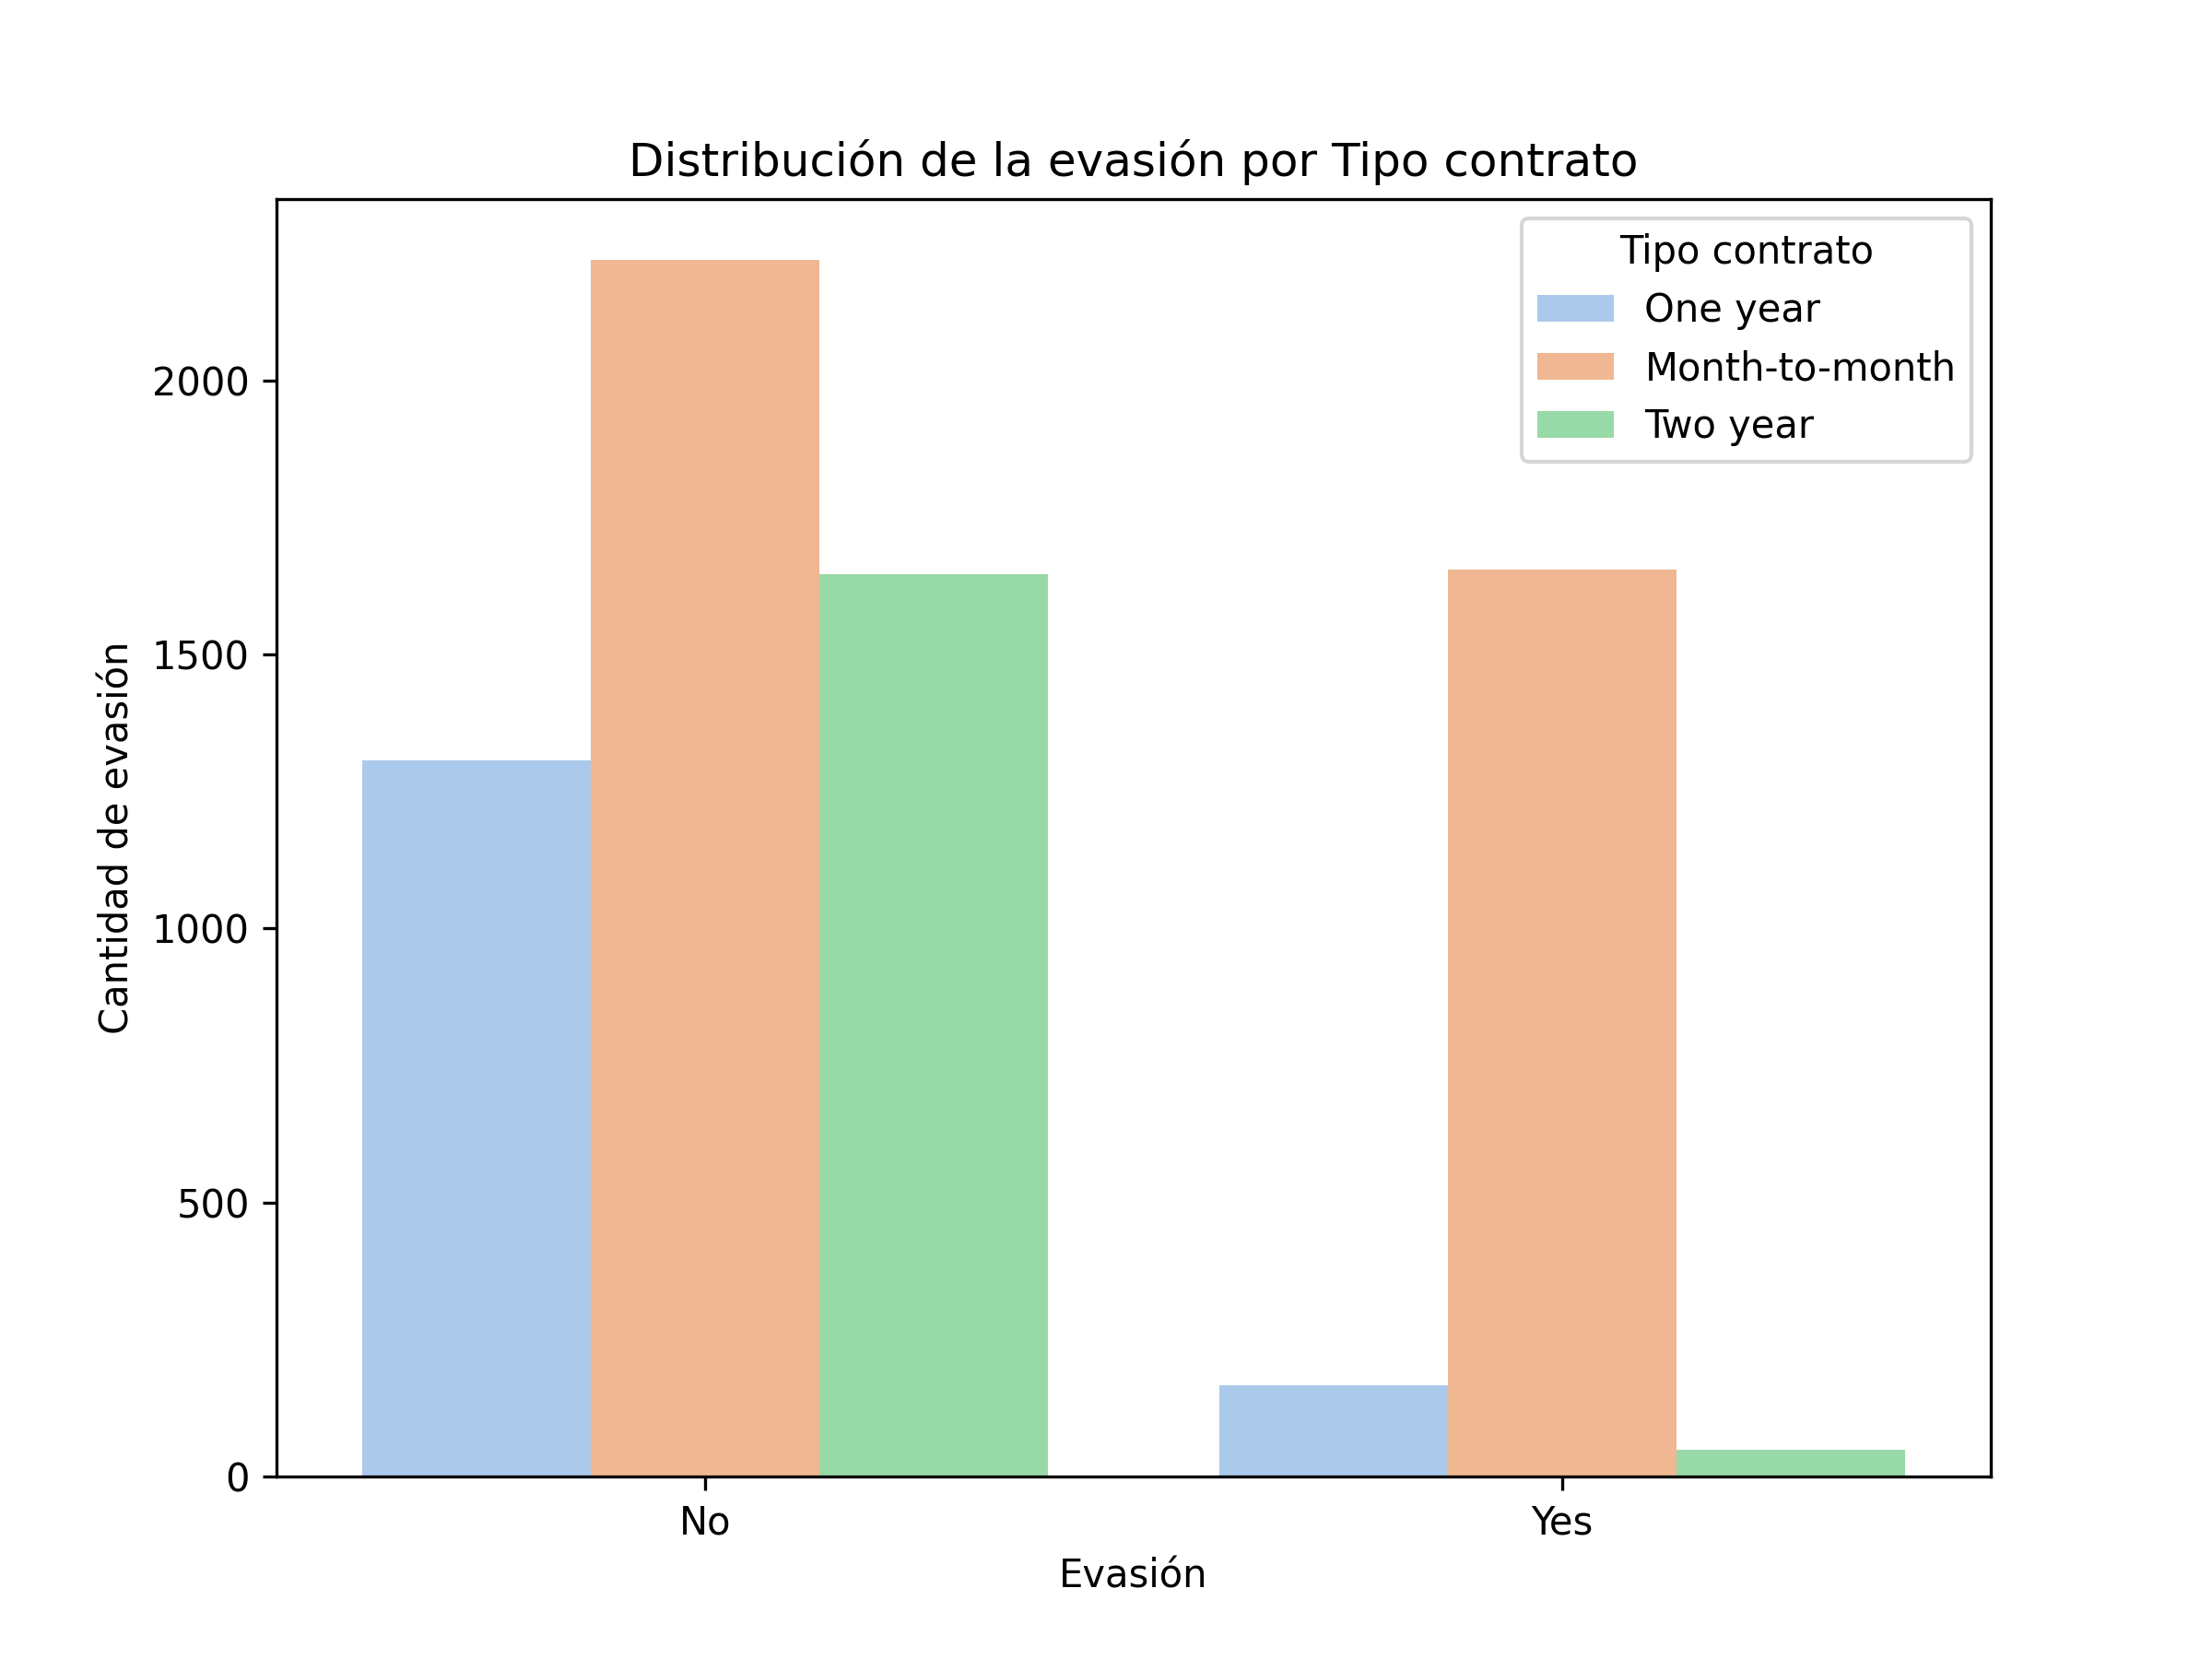

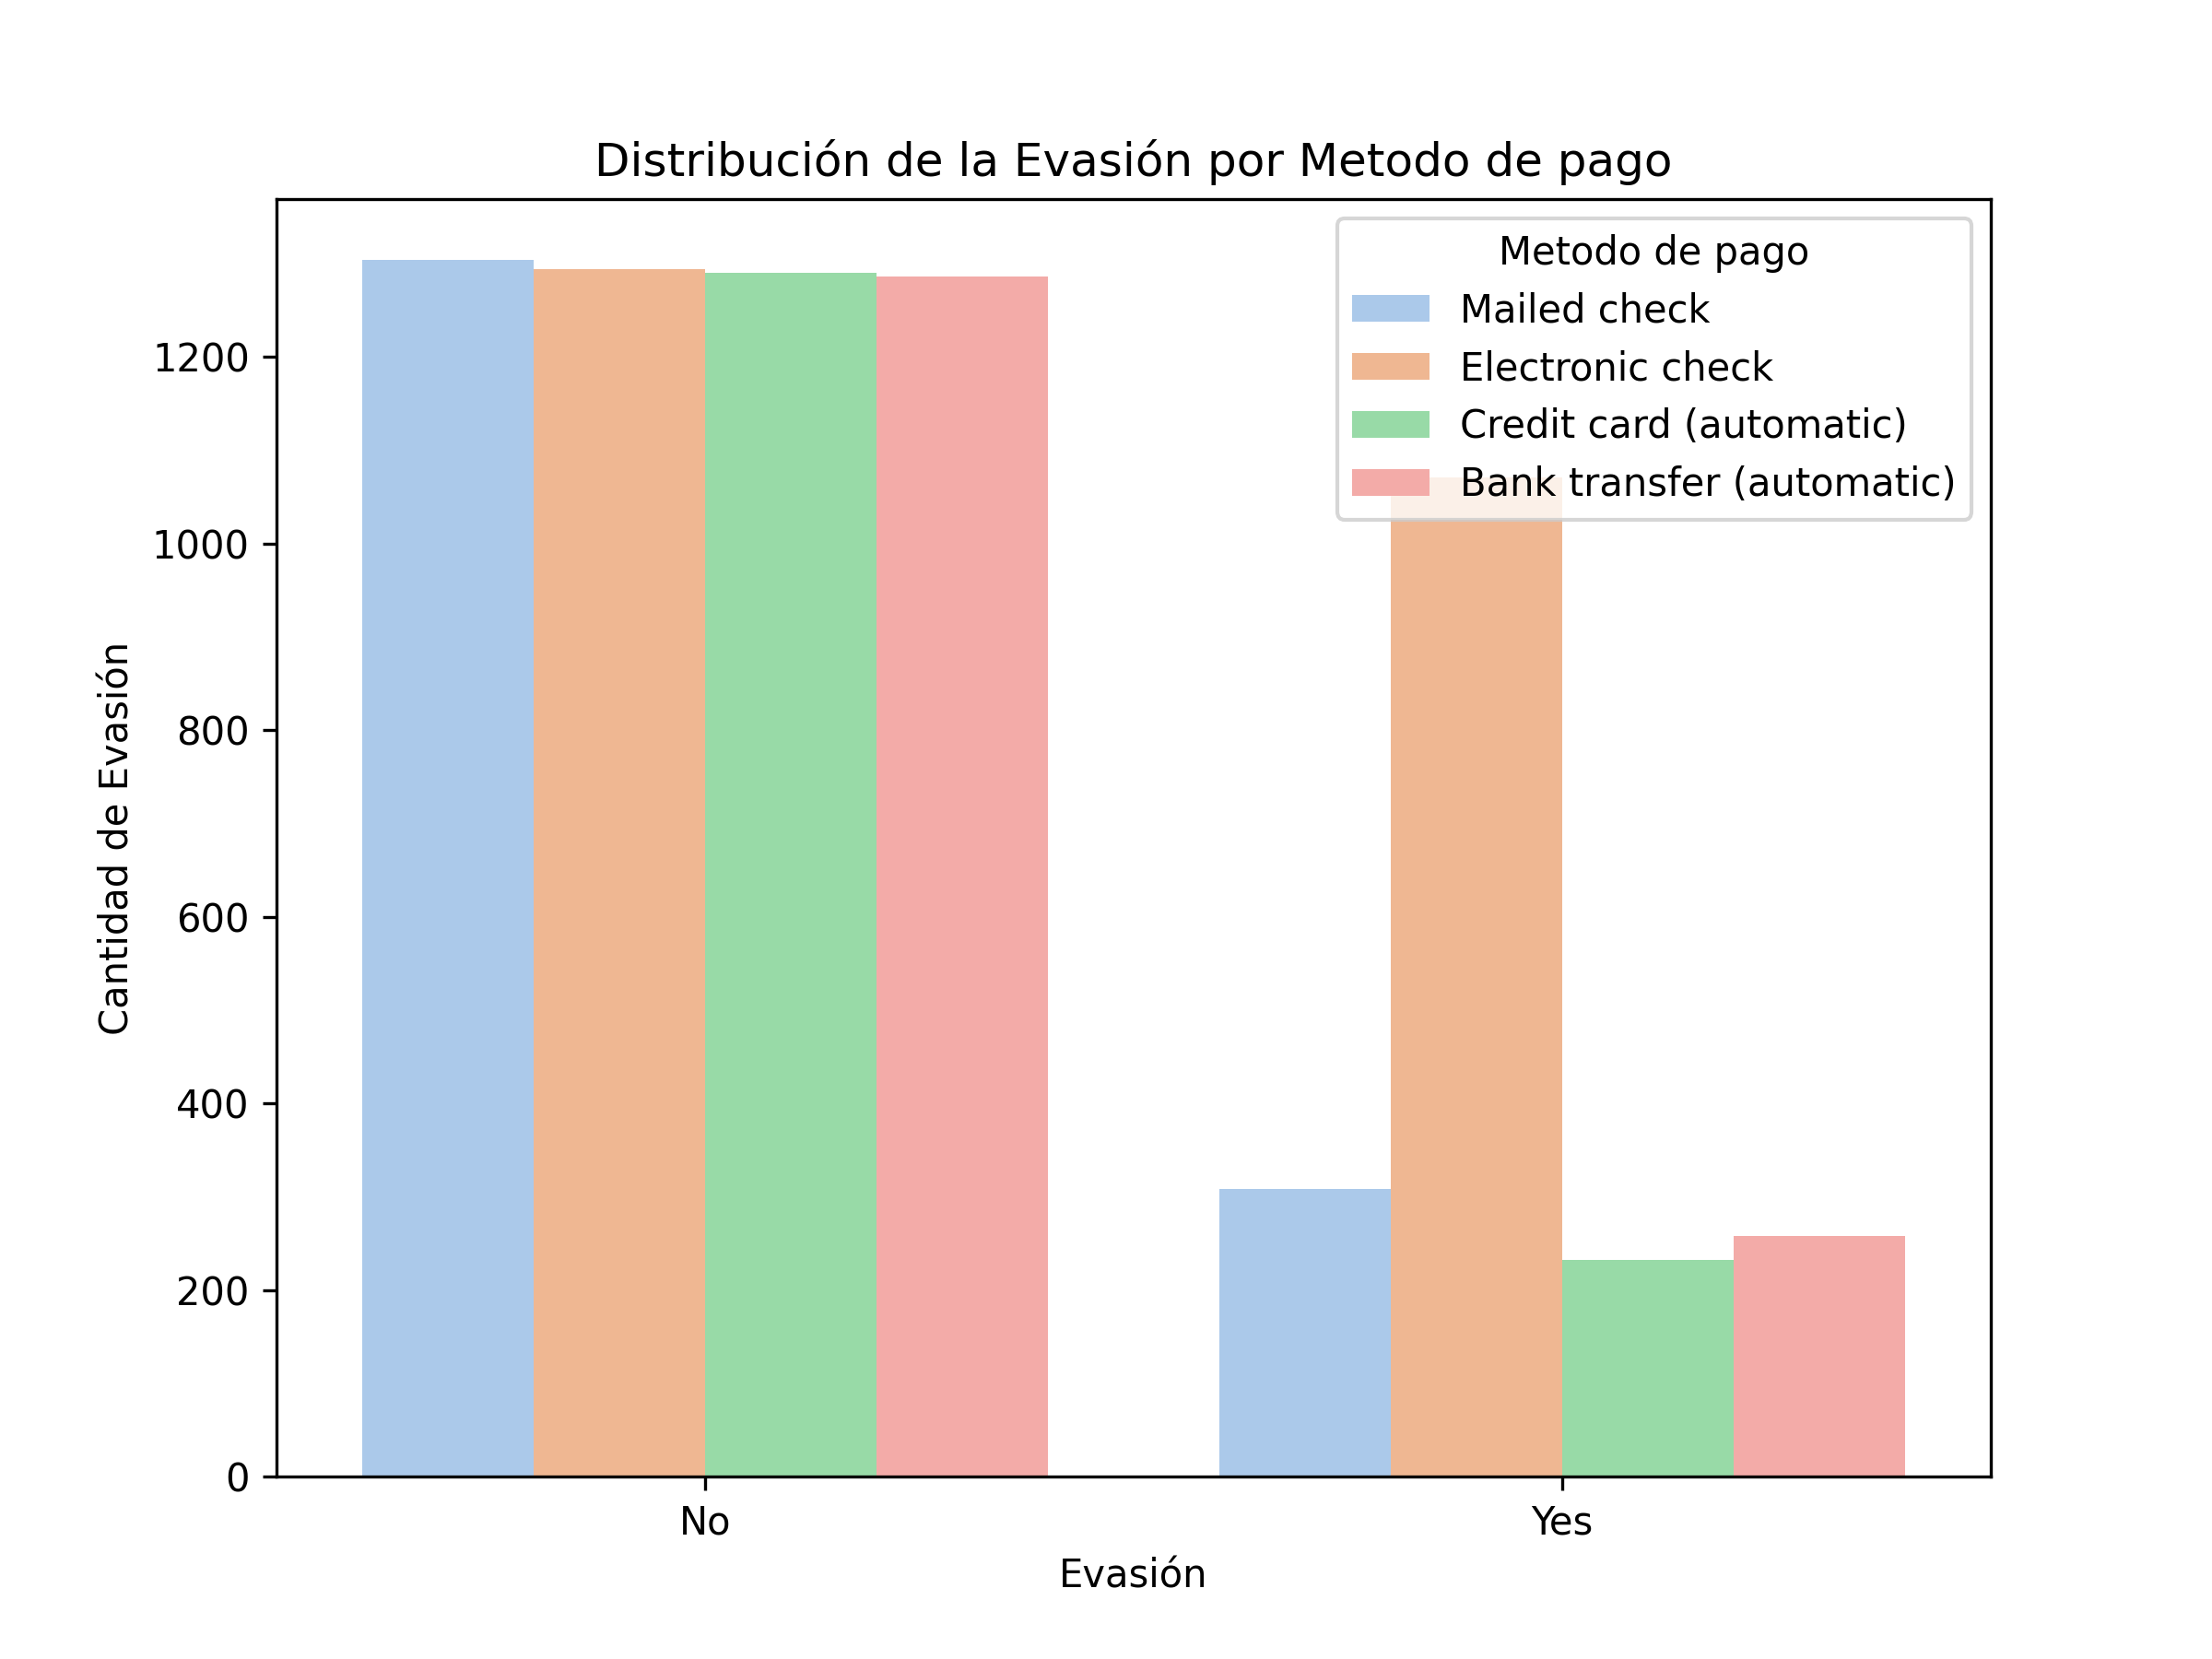

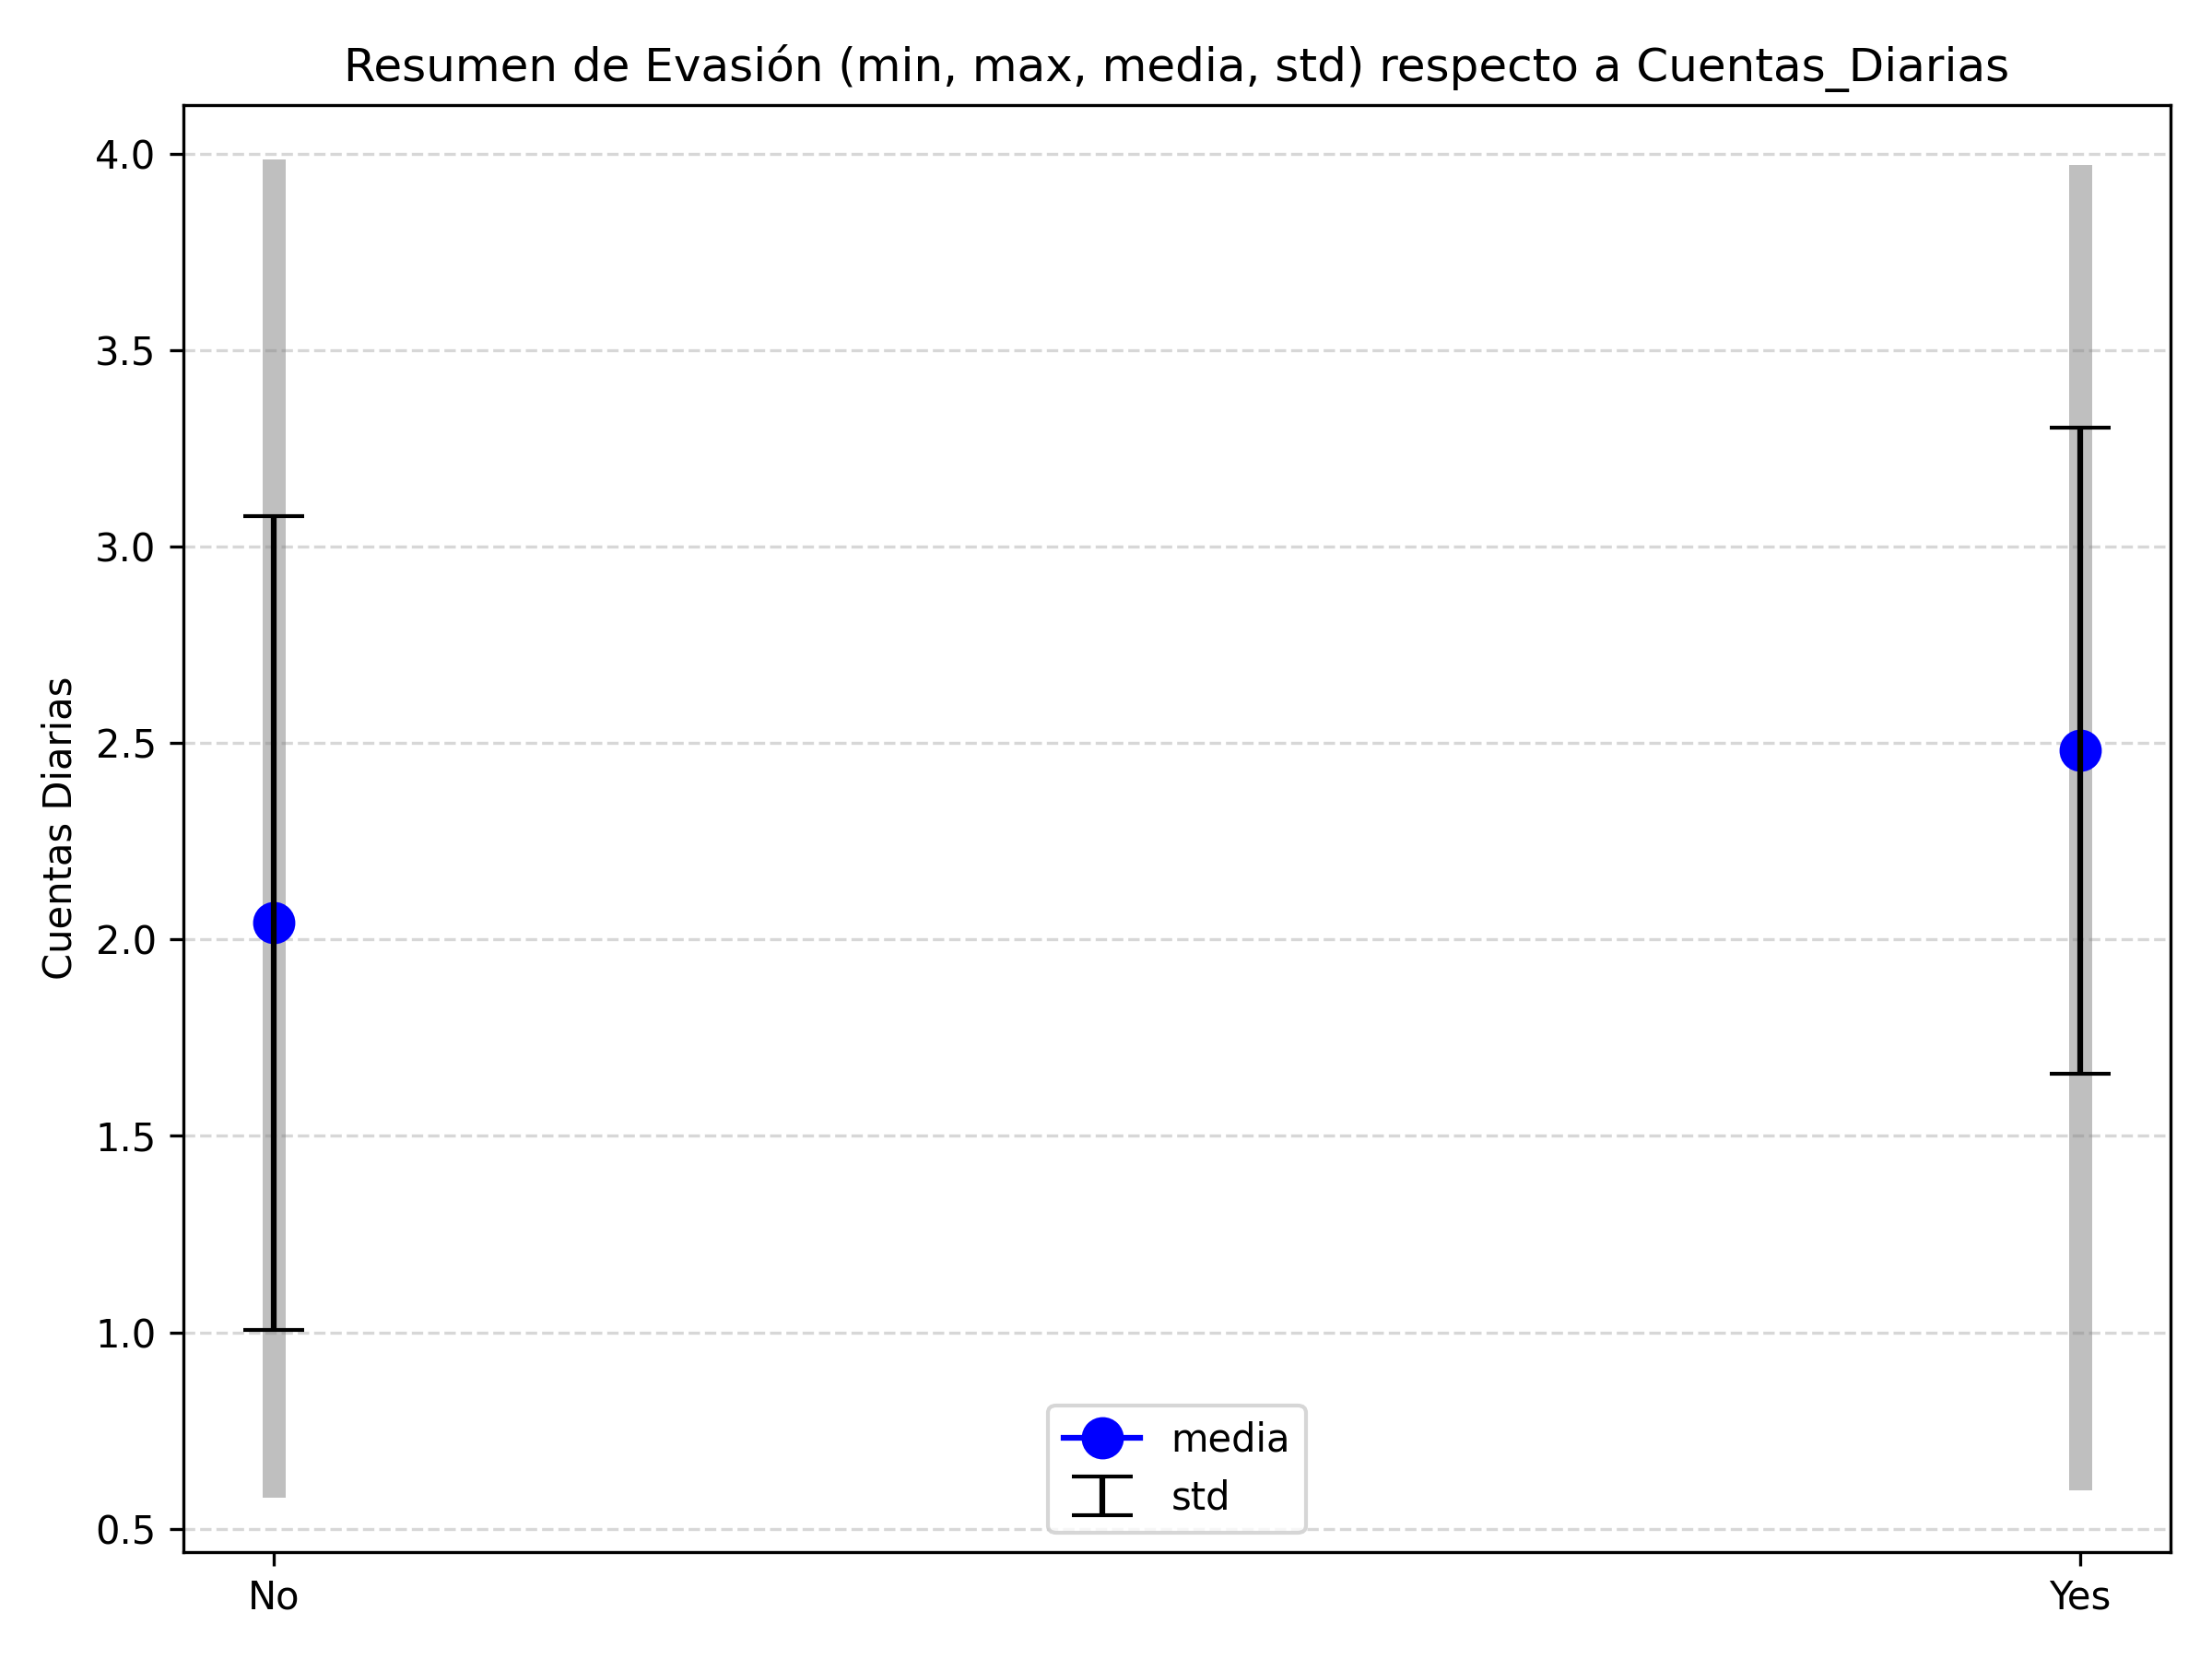

## Conclusiones e Insights

El análisis realizado ha permitido obtener una visión clara sobre el comportamiento de los clientes en relación con la evasión (Churn). A partir del procesamiento y la exploración de los datos, se destacan las siguientes conclusiones e insights relevantes:

1.  La evasión es mayor en el tipo de contrato Month-to-month.
2.  La evasión es mayor en el metodo Electronic check.
3.  La evasión posee un promedio en el monto  de cuentas diarias mayor que en los casos de no evasión.







## Recomendaciones

Con base en el análisis exploratorio de los datos y la identificación de patrones asociados a la evasión de clientes, se proponen las siguientes estrategias orientadas a reducir el churn y mejorar la retención:

Implementar alertas de riesgo de churn

1. Para evitar la evasión en el tipo de contrato Month-to-month, se sugiere evitar entregar este tipo de contrato a nuevos clientes hasta conocer su comportamiento comercial historico.


2. Para evitar la evasión en el metodo Electronic check se sugiere evitar entregar este metodo de pago a nuevos clientes hasta conocer su comportamiento comercial historico.

3. En general, para evitar la evasión de los clientes, se sugiere monitorear el promedio en el monto de cuentas diarias identificando aquellos que se acerquen al promedio de evasión, el cual actualmente es de 2,5.


Segmentar a los clientes según sus patrones de comportamiento comercial, para enviar mensajes personalizados (por ejemplo, recomendaciones de uso, beneficios exclusivos o encuestas de satisfacción) que fomenten una mayor conexión con el servicio.
